## メモ
前処理内容
- 欠損値のあるデータを削除（データ数 : 48842 => 45222）
- カテゴリカル変数を one hot encoding（特徴量数 : 15 => 105）

作成したデータは"pre_adult.csv"として保存

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [14]:
data1 = pd.read_table('adult.data', header=None, sep=', ', na_values='?', engine='python')
data2 = pd.read_table('adult2.test', header=None, sep=', ', na_values='?', engine='python')

data = pd.concat([data1, data2])
column = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", 
          "race", "sex", "capital_gain", "capital_loss", "hours_per_work", "native_country", "label"]
data.columns = column
data["label"] = data["label"].str.replace(".", "")
#data["label"] = data["label"].map( {"<=50K": 0 , ">50K":1}).astype(int)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
print(data.info())
print("-"*50)
print("age, fnlwgt, education_num, capital_gain and capital_loss are numeric features")
print("other features are categorical")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_work  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  label           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB
None
--------------------------------------------------
age, fnlwgt, education_num, capital_g

In [16]:
print("shape of data")
print(data.shape)
print()
print("number of unique")
print(data.nunique())

shape of data
(48842, 15)

number of unique
age                  74
workclass             8
fnlwgt            28523
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        123
capital_loss         99
hours_per_work       96
native_country       41
label                 2
dtype: int64


In [17]:
for col, values in data.iteritems():
    num_unique = values.nunique()
    print("unique number of " + col + " : " + str(num_unique))
    print("unipue value : " + str(values.unique()))
    print()


unique number of age : 74
unipue value : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

unique number of workclass : 8
unipue value : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']

unique number of fnlwgt : 28523
unipue value : [ 77516  83311 215646 ... 173449  89686 350977]

unique number of education : 16
unipue value : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

unique number of education_num : 16
unipue value : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

unique number of marital_status : 7
unipue value : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-

In [18]:
print(data.isnull().sum())
print()
print("workclass, occupation, native_country has ? (which means no data)")

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_work       0
native_country     857
label                0
dtype: int64

workclass, occupation, native_country has ? (which means no data)


In [19]:
drop_data = data.dropna()
print(drop_data.shape)

(45222, 15)


In [20]:
drop_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_work,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 削除する特徴量

- "age", 残す
- "workclass", 4つに分ける 
- "fnlwgt", いらない
- "education", いらない（education_numと同じ）
- "education_num", 残す
- "marital_status", singleとmarriedのバイナリに
- "occupation", ５つに分ける 
- "relationship", いらない
- "race", white, otherのバイナリ
- "sex", 残す
- "capiral_gain", 残す
- "capiral_loss", 残す
- "hours_per_work", 残す
- "native_country" 残す

In [21]:
drop = ["fnlwgt", "education", "relationship"]
r_data = drop_data.drop(drop, axis=1)
r_data.head()

,age,workclass,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_work,native_country,label
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


In [22]:
def process_workclass(dataset):
    workclass = []
    for index, row in dataset.iterrows():

        if(row['workclass'] in ["Federal-gov", "Local-gov", "State-gov"] ):
            workclass.append("Gov")

        if(row['workclass'] in ["Private"] ):
                workclass.append("private")

        if(row['workclass'] in ["Self-emp-inc", "Self-emp-not-inc"] ):
            workclass.append("selfEmployed")

        if(row['workclass'] in ["Without-pay", "Never-worked" ] ):
            workclass.append("unEmployed")

    dataset['workclass'] = workclass
    
    return dataset

In [23]:
def process_occupation(dataset):
    occupation = []
    for index, row in dataset.iterrows():

        if(row['occupation'] in ["Craft-repair", "Farming-fishing","Handlers-cleaners", "Machine-op-inspct", "Transport-moving"] ):
            occupation.append("blueCollar")

        if(row['occupation'] in ["Exec-managerial"] ):
            occupation.append("whiteCollar")
            
        if(row['occupation'] in ["Sales"] ):
            occupation.append("sales")

        if(row['occupation'] in ["Prof-specialty"] ):
            occupation.append("professional")

        if(row['occupation'] in ["Tech-support", "Protective-serv", "Armed-Forces", "Other-service", "Priv-house-serv", "Adm-clerical"] ):
                occupation.append("other")

    dataset['occupation'] = occupation
    return dataset

In [24]:
process_workclass(r_data)
process_occupation(r_data)
r_data.head()

,age,workclass,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_work,native_country,label
0,39,Gov,13,Never-married,other,White,Male,2174,0,40,United-States,<=50K
1,50,selfEmployed,13,Married-civ-spouse,whiteCollar,White,Male,0,0,13,United-States,<=50K
2,38,private,9,Divorced,blueCollar,White,Male,0,0,40,United-States,<=50K
3,53,private,7,Married-civ-spouse,blueCollar,Black,Male,0,0,40,United-States,<=50K
4,28,private,13,Married-civ-spouse,professional,Black,Female,0,0,40,Cuba,<=50K


In [25]:
r_data['sex'] = r_data['sex'].apply(lambda x: 1 if x == 'Male' else 0)
r_data['marital_status'] = r_data['marital_status'].apply(lambda x: 0 if x == 'Never-married' else 1)
r_data['race'] = r_data['race'].apply(lambda x: 1 if x == 'White' else 0)
r_data['native_country'] = r_data['native_country'].apply(lambda x: 1 if x == 'United-States' else 0)
r_data.head()

,age,workclass,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_work,native_country,label
0,39,Gov,13,0,other,1,1,2174,0,40,1,<=50K
1,50,selfEmployed,13,1,whiteCollar,1,1,0,0,13,1,<=50K
2,38,private,9,1,blueCollar,1,1,0,0,40,1,<=50K
3,53,private,7,1,blueCollar,0,1,0,0,40,1,<=50K
4,28,private,13,1,professional,0,0,0,0,40,0,<=50K


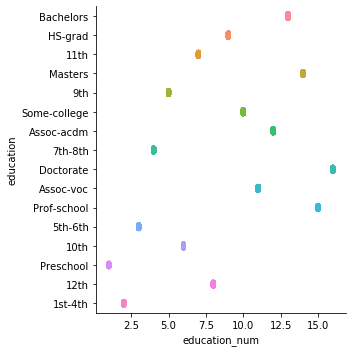

In [26]:
sns.catplot(x="education_num", y="education", data=drop_data)

In [27]:
categorical = ["workclass", "occupation"]
encode_data = pd.get_dummies(r_data, columns=categorical)
encode_data.head()

,age,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_work,native_country,label,workclass_Gov,workclass_private,workclass_selfEmployed,workclass_unEmployed,occupation_blueCollar,occupation_other,occupation_professional,occupation_sales,occupation_whiteCollar
0,39,13,0,1,1,2174,0,40,1,<=50K,1,0,0,0,0,1,0,0,0
1,50,13,1,1,1,0,0,13,1,<=50K,0,0,1,0,0,0,0,0,1
2,38,9,1,1,1,0,0,40,1,<=50K,0,1,0,0,1,0,0,0,0
3,53,7,1,0,1,0,0,40,1,<=50K,0,1,0,0,1,0,0,0,0
4,28,13,1,0,0,0,0,40,0,<=50K,0,1,0,0,0,0,1,0,0


In [28]:
print(encode_data.shape)

(45222, 19)


In [29]:
encode_data.head()

,age,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_work,native_country,label,workclass_Gov,workclass_private,workclass_selfEmployed,workclass_unEmployed,occupation_blueCollar,occupation_other,occupation_professional,occupation_sales,occupation_whiteCollar
0,39,13,0,1,1,2174,0,40,1,<=50K,1,0,0,0,0,1,0,0,0
1,50,13,1,1,1,0,0,13,1,<=50K,0,0,1,0,0,0,0,0,1
2,38,9,1,1,1,0,0,40,1,<=50K,0,1,0,0,1,0,0,0,0
3,53,7,1,0,1,0,0,40,1,<=50K,0,1,0,0,1,0,0,0,0
4,28,13,1,0,0,0,0,40,0,<=50K,0,1,0,0,0,0,1,0,0


In [ ]:
encode_data.to_csv("pre_adlut2.csv")

In [30]:
drop_feature = ["native_country", "workclass_Gov", "workclass_private", "workclass_selfEmployed", "workclass_unEmployed"]
new_data = encode_data.drop(drop_feature, axis=1)
new_data.head()

,age,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_work,label,occupation_blueCollar,occupation_other,occupation_professional,occupation_sales,occupation_whiteCollar
0,39,13,0,1,1,2174,0,40,<=50K,0,1,0,0,0
1,50,13,1,1,1,0,0,13,<=50K,0,0,0,0,1
2,38,9,1,1,1,0,0,40,<=50K,1,0,0,0,0
3,53,7,1,0,1,0,0,40,<=50K,1,0,0,0,0
4,28,13,1,0,0,0,0,40,<=50K,0,0,1,0,0


In [ ]:
new_data.to_csv("pre_adult3.csv")

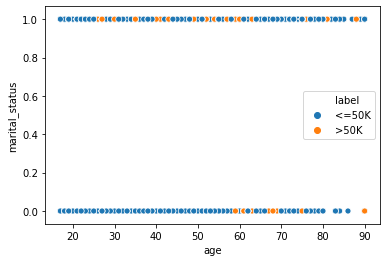

In [32]:
sns.scatterplot(x="age", y="marital_status", data=new_data, hue="label")

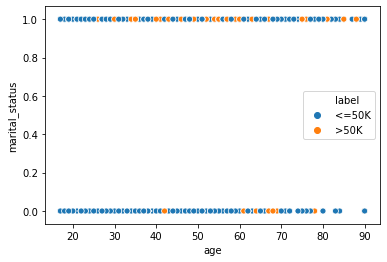

In [53]:
sns.scatterplot(x="age", y="marital_status", data=new_data[new_data["sex"]==1], hue="label")

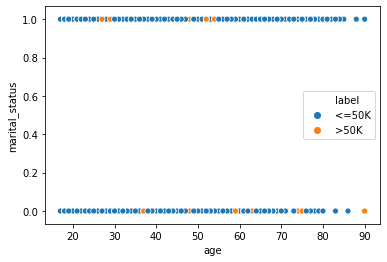

In [54]:
sns.scatterplot(x="age", y="marital_status", data=new_data[new_data["sex"]==0], hue="label")

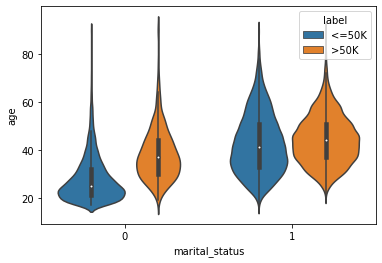

In [62]:
sns.violinplot(x="marital_status", y="age", data=new_data, hue="label")

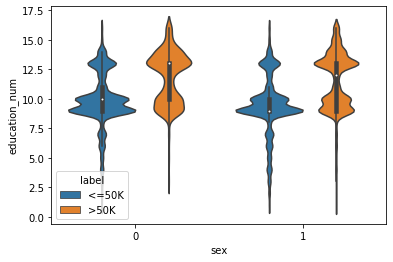

In [59]:
sns.violinplot(x="sex", y="education_num", data=new_data, hue="label")

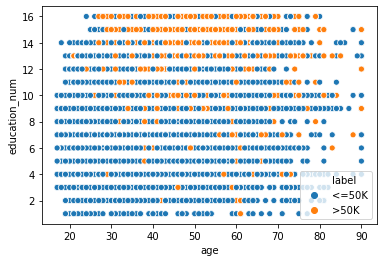

In [33]:
sns.scatterplot(x="age", y="education_num", data=new_data, hue="label")

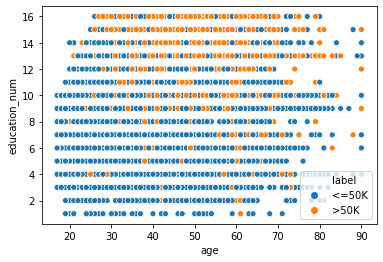

In [56]:
sns.scatterplot(x="age", y="education_num", data=new_data[new_data["sex"]==1], hue="label")

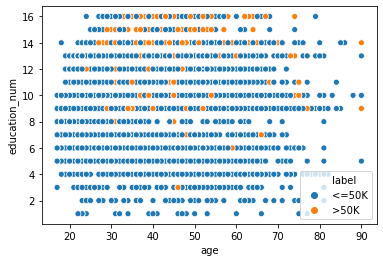

In [57]:
sns.scatterplot(x="age", y="education_num", data=new_data[new_data["sex"]==0], hue="label")

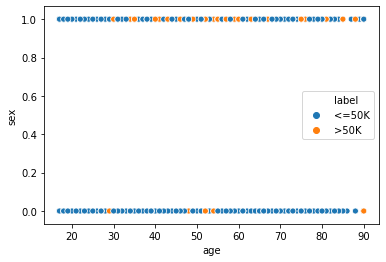

In [34]:
sns.scatterplot(x="age", y="sex", data=new_data, hue="label")

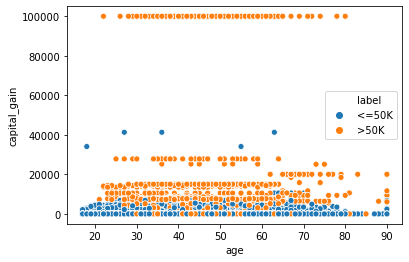

In [51]:
sns.scatterplot(x="age", y="capital_gain", data=new_data[new_data["sex"]==1], 
                hue="label")

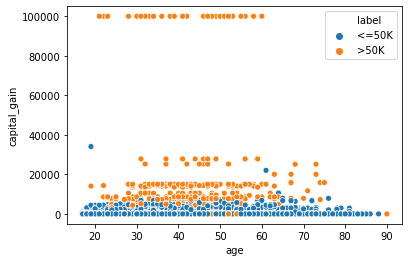

In [52]:
sns.scatterplot(x="age", y="capital_gain", data=new_data[new_data["sex"]==0], 
                hue="label")

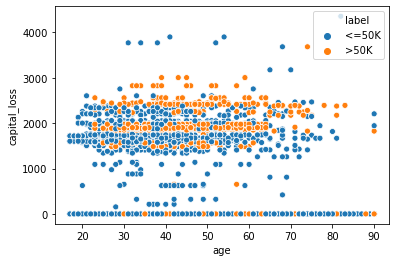

In [36]:
sns.scatterplot(x="age", y="capital_loss", data=new_data, hue="label")

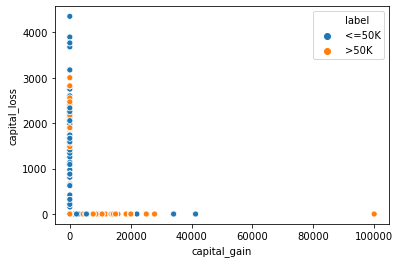

In [37]:
sns.scatterplot(x="capital_gain", y="capital_loss", data=new_data, hue="label")

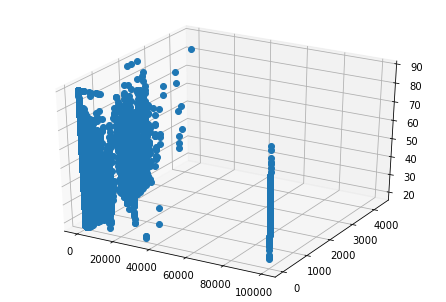

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x = new_data.capital_gain
y = new_data.capital_loss
z = new_data.age

ax.plot(x,y,z,marker="o",linestyle='None', label=new_data.label)


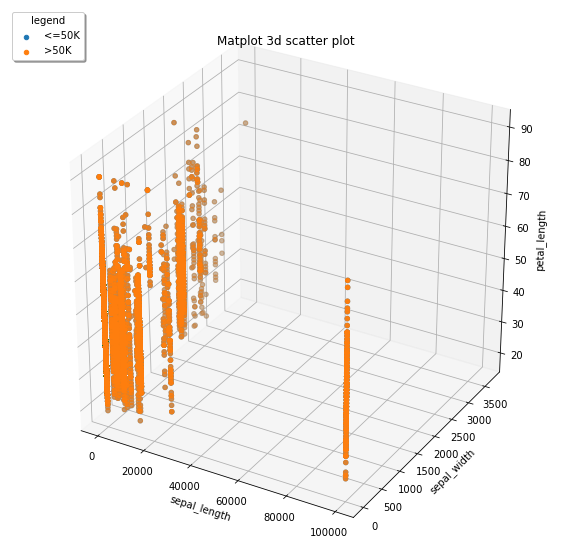

In [46]:


hue = 'label'
labels = set(new_data[hue])
dataset = []
for x in labels:
    xs = new_data[new_data[hue]==x]['capital_gain']
    ys = new_data[new_data[hue]==x]['capital_loss']
    zs = new_data[new_data[hue]==x]['age']
    dataset.append((xs, ys, zs))

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1, projection='3d')
for data, label in zip(dataset, labels):
    ax.scatter(xs, ys, zs, label=label)
    
ax.set_title('Matplot 3d scatter plot')  # タイトル
ax.set_xlabel('sepal_length')  # X軸ラベル
ax.set_ylabel('sepal_width')  # Y軸ラベル
ax.set_zlabel('petal_length')  # Z軸ラベル
ax.legend(loc=2, title='legend', shadow=True)  # 凡例

In [45]:
new_data.to_csv("pre_adult4.csv")

In [47]:
print(dataset)

[(0        2174
1           0
2           0
3           0
4           0
         ... 
16274       0
16275       0
16276       0
16278       0
16279    5455
Name: capital_gain, Length: 34014, dtype: int64, 0        0
1        0
2        0
3        0
4        0
        ..
16274    0
16275    0
16276    0
16278    0
16279    0
Name: capital_loss, Length: 34014, dtype: int64, 0        39
1        50
2        38
3        53
4        28
         ..
16274    48
16275    33
16276    39
16278    38
16279    44
Name: age, Length: 34014, dtype: int64), (7            0
8        14084
9         5178
10           0
11           0
         ...  
16252     7688
16254        0
16255        0
16261    15024
16280        0
Name: capital_gain, Length: 11208, dtype: int64, 7           0
8           0
9           0
10          0
11          0
         ... 
16252       0
16254       0
16255    1902
16261       0
16280       0
Name: capital_loss, Length: 11208, dtype: int64, 7        52
8        31
9        4

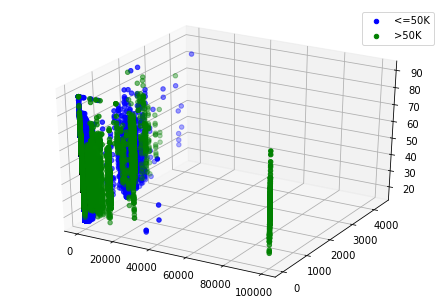

In [50]:
import matplotlib.colors as mcolors
colors = list(mcolors.BASE_COLORS.keys())

fig = plt.figure()
ax = Axes3D(fig)

labels = set(new_data['label'])
for idx, label in enumerate(labels):
    df2 = new_data[new_data['label'] == label]
    X = df2["capital_gain"]
    Y = df2["capital_loss"]
    Z = df2["age"]
    p=ax.scatter(X, Y, Z, c=colors[idx], label=label)

plt.legend()
plt.show()